# Predicting Tennis Match Winners and Losers
#### AIT580 
#### Final Class Project
- Hunter Walden, Kevin Mitchell, Jason Myslewski
- 13 July 2022

## Introduction

## Purpose

## Methods

## Table of Contents:

### Column Name Meanings:

**Attribute Information:**

1. Player 1 Name of Player 1
2. Player 2 Name of Player 2
3. Result Result of the match (0/1) - Referenced on Player 1 is Result = 1 if Player 1 wins (FNL.1>FNL.2)
4. FSP.1 First Serve Percentage for player 1 (Real Number)
5. FSW.1 First Serve Won by player 1 (Real Number)
6. SSP.1 Second Serve Percentage for player 1 (Real Number)
7. SSW.1 Second Serve Won by player 1 (Real Number)
8. ACE.1 Aces won by player 1 (Numeric-Integer)
9. DBF.1 Double Faults committed by player 1 (Numeric-Integer)
10. WNR.1 Winners earned by player 1 (Numeric)
11. UFE.1 Unforced Errors committed by player 1 (Numeric)
12. BPC.1 Break Points Created by player 1 (Numeric)
13. BPW.1 Break Points Won by player 1 (Numeric)
14. NPA.1 Net Points Attempted by player 1 (Numeric)
15. NPW.1 Net Points Won by player 1 (Numeric)
16. TPW.1 Total Points Won by player 1 (Numeric)
17. ST1.1 Set 1 result for Player 1 (Numeric-Integer)
18. ST2.1 Set 2 Result for Player 1 (Numeric-Integer)
19. ST3.1 Set 3 Result for Player 1 (Numeric-Integer)
20. ST4.1 Set 4 Result for Player 1 (Numeric-Integer)
21. ST5.1 Set 5 Result for Player 1 (Numeric-Integer)
22. FNL.1 Final Number of Games Won by Player 1 (Numeric-Integer)
23. FSP.2 First Serve Percentage for player 2 (Real Number)
24. FSW.2 First Serve Won by player 2 (Real Number)
25. SSP.2 Second Serve Percentage for player 2 (Real Number)
26. SSW.2 Second Serve Won by player 2 (Real Number)
27. ACE.2 Aces won by player 2 (Numeric-Integer)
28. DBF.2 Double Faults committed by player 2 (Numeric-Integer)
29. WNR.2 Winners earned by player 2 (Numeric)
30. UFE.2 Unforced Errors committed by player 2 (Numeric)
31. BPC.2 Break Points Created by player 2 (Numeric)
32. BPW.2 Break Points Won by player 2 (Numeric)
33. NPA.2 Net Points Attempted by player 2 (Numeric)
34. NPW.2 Net Points Won by player 2 (Numeric)
35. TPW.2 Total Points Won by player 2 (Numeric)
36. ST1.2 Set 1 result for Player 2 (Numeric-Integer)
37. ST2.2 Set 2 Result for Player 2 (Numeric-Integer)
38. ST3.2 Set 3 Result for Player 2 (Numeric-Integer)
39. ST4.2 Set 4 Result for Player 2 (Numeric-Integer)
40. ST5.2 Set 5 Result for Player 2 (Numeric-Integer)
41. FNL.2 Final Number of Games Won by Player 2 (Numeric-Integer)
42. Round Round of the tournament at which game is played (Numeric-Integer)

## Part 1: Data Cleaning

#### Data Cleaning Checklist
1. Import data sets
2. Rename columns
3. Concatenate sets
4. Check for consistency in data types. 
5. Check for duplicate rows
6. Validate and create the final data set. 

In [1]:
# import libraries
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# import csv files
aus_men = pd.read_csv("AusOpen-men-2013.csv")
aus_women = pd.read_csv("AusOpen-women-2013.csv")
french_men = pd.read_csv("FrenchOpen-men-2013.csv")
french_women = pd.read_csv("FrenchOpen-women-2013.csv")
us_men = pd.read_csv("USOpen-men-2013.csv")
us_women = pd.read_csv("USOpen-women-2013.csv")
wimb_men = pd.read_csv("Wimbledon-men-2013.csv")
wimb_women = pd.read_csv("Wimbledon-women-2013.csv")

In [4]:
# create a list of all 8 data frames
dfs = [aus_men, aus_women, french_men, french_women, us_men, us_women, 
       wimb_men, wimb_women]

# create a list of the column names as they need to appear in each df
col_names = ['Player1', 'Player2', 'Round', 'Result', 'FNL.1', 'FNL.2', 
             'FSP.1','FSW.1', 'SSP.1', 'SSW.1', 'ACE.1', 'DBF.1', 'WNR.1', 
             'UFE.1', 'BPC.1', 'BPW.1', 'NPA.1', 'NPW.1', 'TPW.1', 'ST1.1', 
             'ST2.1', 'ST3.1', 'ST4.1', 'ST5.1', 'FSP.2', 'FSW.2', 'SSP.2', 
             'SSW.2', 'ACE.2', 'DBF.2', 'WNR.2', 'UFE.2', 'BPC.2', 'BPW.2', 
             'NPA.2', 'NPW.2', 'TPW.2', 'ST1.2', 'ST2.2', 'ST3.2', 'ST4.2', 
             'ST5.2']

In [5]:
# function to check column names
def column_checker(dfs, colNames):                       
    '''This function will check all the column names in each data frame 
    to match the column names that are listed in the standardized list 
    of column names. 
    
    The function will return the column name that is incorrect, and the 
    number of names that are incorrect for each data frame.
    '''
    num = 0
    for data in dfs:
        rename = []
        for i in range(len(col_names)):
            li = list(data.columns)
            if li[i] != col_names[i]:
                print(f'{li[i]} needs to be fixed')
                rename.append(li[i])
        print(f'{len(rename)} columns need to be renamed in dfs[{num}]')
        print('-----')
        num += 1
        rename.clear()

In [6]:
column_checker(dfs, col_names)

FNL1 needs to be fixed
FNL2 needs to be fixed
2 columns need to be renamed in dfs[0]
-----
FNL1 needs to be fixed
FNL2 needs to be fixed
2 columns need to be renamed in dfs[1]
-----
0 columns need to be renamed in dfs[2]
-----
0 columns need to be renamed in dfs[3]
-----
FNL1 needs to be fixed
FNL2 needs to be fixed
2 columns need to be renamed in dfs[4]
-----
Player 1 needs to be fixed
Player 2 needs to be fixed
ROUND needs to be fixed
ST2.1.1 needs to be fixed
4 columns need to be renamed in dfs[5]
-----
0 columns need to be renamed in dfs[6]
-----
ST1.1.1 needs to be fixed
1 columns need to be renamed in dfs[7]
-----


During the initial inspection of each of the 8 data frames above, we 
notices there are many columns that have inconcistent naming conention. 
Below we identified the specific columns in each data frame that required 
renaming, then printed the column names of each data frame to validae 
consistency. 

In [7]:
# rename columns for consistency
aus_men = aus_men.rename(columns={'FNL1': 'FNL.1', 'FNL2': 'FNL.2'})
aus_women = aus_women.rename(columns={'FNL1': 'FNL.1', 'FNL2': 'FNL.2'})
us_men = us_men.rename(columns={'FNL1': 'FNL.1', 'FNL2': 'FNL.2'})
us_women = us_women.rename(columns={'ST2.1.1': 'ST1.2', 'Player 1': 'Player1', 
                                    'Player 2': 'Player2', 'ROUND':'Round'})
wimb_women = wimb_women.rename(columns={'ST1.1.1': 'ST1.2'})

In [8]:
# create a new list to check col names using our column_checker function
dfs1 = [aus_men, aus_women, french_men, french_women, 
        us_men, us_women, wimb_men, wimb_women]
column_checker(dfs1, col_names)

0 columns need to be renamed in dfs[0]
-----
0 columns need to be renamed in dfs[1]
-----
0 columns need to be renamed in dfs[2]
-----
0 columns need to be renamed in dfs[3]
-----
0 columns need to be renamed in dfs[4]
-----
0 columns need to be renamed in dfs[5]
-----
0 columns need to be renamed in dfs[6]
-----
0 columns need to be renamed in dfs[7]
-----


All column names are fixed and the data frames are ready to be concatentated. 
We will concatentate all 8 data frames regardless of tournament name and 
agnostic to gender. 

In [9]:
# look at the shape of each individual data frame. 
for d in dfs:
    print(d.shape)

(126, 42)
(127, 42)
(125, 42)
(127, 42)
(126, 42)
(76, 42)
(114, 42)
(122, 42)


In [10]:
# concatentate all 8 data frames into one. 
df = pd.concat(dfs1)

Now that all 8 data frames are concatenated into one data frame, we need to do some more manipulation. Each row of the data frame contains stats for each match and includes information on both player 1 and player 2. We need to have a data frame where every row is one discrete player and contains an appropriate win/loss label i.e. (1, 0). Below we will divide the columns and create two data frames based on player 1 and player two. Then we will reindex the columns and rename the columns so that both data frames are identical. We will also add a win/loss label to player two data frame. We will concatenate both player1 and player 2 data frames into one final data frame that will be ready for exploration.

In [11]:
# data frame manipulate to generate a dataframe that has one discrete
# player per row. 
player_1 = df[['Result', 'FNL.1', 'FSP.1','FSW.1', 'SSP.1', 
              'SSW.1', 'ACE.1', 'DBF.1', 'WNR.1', 'UFE.1', 'BPC.1', 
              'BPW.1', 'NPA.1', 'NPW.1', 'TPW.1', 'ST1.1', 'ST2.1', 
              'ST3.1', 'ST4.1', 'ST5.1']]
player_2 = df[['FNL.2', 'FSP.2', 'FSW.2', 'SSP.2', 'SSW.2', 'ACE.2', 
               'DBF.2', 'WNR.2', 'UFE.2', 'BPC.2', 'BPW.2', 'NPA.2', 
               'NPW.2', 'TPW.2', 'ST1.2', 'ST2.2', 'ST3.2', 'ST4.2', 
               'ST5.2']]

# assign win/loss (1, 0) values and assign to player 2 data frame
win_loss_p1 = list(player_1['Result'])
win_loss_p2 = []
for result in win_loss_p1:
    if result == 0:
        win_loss_p2.append(1)
    elif result == 1:
        win_loss_p2.append(0)

# validate the results column gererated correctly
print(f'player_1 results {win_loss_p1[:10]}')
print(f'player_2 results {win_loss_p2[:10]}')

player_2.loc[:, 'Result'] = win_loss_p2
col_order = ['Result', 'FNL.2', 'FSP.2', 'FSW.2', 'SSP.2', 'SSW.2', 
             'ACE.2', 'DBF.2', 'WNR.2', 'UFE.2', 'BPC.2', 'BPW.2', 
             'NPA.2', 'NPW.2', 'TPW.2', 'ST1.2', 'ST2.2', 'ST3.2', 
             'ST4.2', 'ST5.2']
player_2 = player_2.reindex(columns=col_order)

player_1 results [0, 1, 0, 1, 0, 0, 0, 1, 0, 1]
player_2 results [1, 0, 1, 0, 1, 1, 1, 0, 1, 0]


C:\Users\htwal\AppData\Local\Temp\ipykernel_12124\4019134439.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_2.loc[:, 'Result'] = win_loss_p2


In [12]:
# rename columns in both data frames 
def rename_cols(df):
    '''This function takes the column names of a data frame and returns
    the same data frame with updated column names.
    '''    
    old_cols = list(df.columns)
    new_names = []
    for name in old_cols:
        new = re.sub('\.\d', '', name)
        new_names.append(new)
    d = {key:value for key, value in zip(old_cols, new_names)}
    df2 = df.rename(columns=d)
    return df2

In [13]:
# standardize col names between player_1 and player_2 data frames:
player_1 = rename_cols(player_1)
player_2 = rename_cols(player_2)

In [14]:
# concatenate player_1 and player_2 data frames:
concats = [player_1, player_2]
df2 = pd.concat(concats)
df2.info()      # should be the 2x rows and .5x cols as df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 0 to 121
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Result  1886 non-null   int64  
 1   FNL     1884 non-null   float64
 2   FSP     1886 non-null   int64  
 3   FSW     1886 non-null   int64  
 4   SSP     1886 non-null   int64  
 5   SSW     1886 non-null   int64  
 6   ACE     1842 non-null   float64
 7   DBF     1870 non-null   float64
 8   WNR     1634 non-null   float64
 9   UFE     1634 non-null   float64
 10  BPC     1884 non-null   float64
 11  BPW     1884 non-null   float64
 12  NPA     1718 non-null   float64
 13  NPW     1720 non-null   float64
 14  TPW     1262 non-null   float64
 15  ST1     1884 non-null   float64
 16  ST2     1878 non-null   float64
 17  ST3     1244 non-null   float64
 18  ST4     442 non-null    float64
 19  ST5     172 non-null    float64
dtypes: float64(15), int64(5)
memory usage: 309.4 KB


In [15]:
# check for duplicate rows:
df2.duplicated().value_counts()

False    1886
dtype: int64

In [16]:
# save the processed data set that we will use for exploratory analysis
df.to_csv('MasterDFv2.csv')

#### Conclusion to Part 1: Data Cleaning

Overall we imported out libraries, and read in 8 csv files containing statistics from 8 major men's and women's tennis tournaments to data frames. We renamed the necessary columns to make each data set uniform, then concatentated all 8 data frames. In total we have 1 data frame with 943 rows and 42 columns. We checked the data frame for duplicate data and found that there are no duplicates. 

In the following section, Part 2: Exploratory Analysis, we will check for outliers, look at correlations, and determine how to handle missing data. 

## Part 2: Exploratory Analysis

In [17]:
# ------------------------------------------------------------------------

#### Check for outliers

In [18]:
# look at the data frame as a whole (excluding first 4 columns, irrlelvant)
df2.describe().round(1)

,Result,FNL,FSP,FSW,SSP,SSW,ACE,DBF,WNR,UFE,BPC,BPW,NPA,NPW,TPW,ST1,ST2,ST3,ST4,ST5
count,1886.0,1884.0,1886.0,1886.0,1886.0,1886.0,1842.0,1870.0,1634.0,1634.0,1884.0,1884.0,1718.0,1720.0,1262.0,1884.0,1878.0,1244.0,442.0,172.0
mean,0.5,1.5,62.1,38.7,37.9,16.8,6.1,3.7,27.7,27.5,5.3,7.1,15.7,17.4,94.4,4.8,4.7,4.8,4.7,4.9
std,0.5,1.2,8.1,17.5,8.2,8.7,6.0,2.7,16.0,15.0,3.9,5.1,12.2,12.3,36.8,1.9,1.9,1.9,1.9,2.0
min,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,57.0,26.0,33.0,10.0,2.0,2.0,16.0,17.0,2.0,3.0,7.0,8.0,66.0,3.0,3.0,3.0,3.0,4.0
50%,0.5,2.0,62.0,36.0,38.0,15.0,4.0,3.0,25.0,26.0,5.0,6.0,13.0,15.0,92.0,6.0,6.0,6.0,6.0,6.0
75%,1.0,2.0,67.0,49.0,43.0,22.0,9.0,5.0,36.0,36.0,7.0,10.0,21.0,24.0,117.0,6.0,6.0,6.0,6.0,6.0
max,1.0,3.0,93.0,132.0,100.0,57.0,41.0,18.0,111.0,96.0,25.0,28.0,96.0,81.0,231.0,7.0,7.0,9.0,7.0,9.0


<AxesSubplot:>

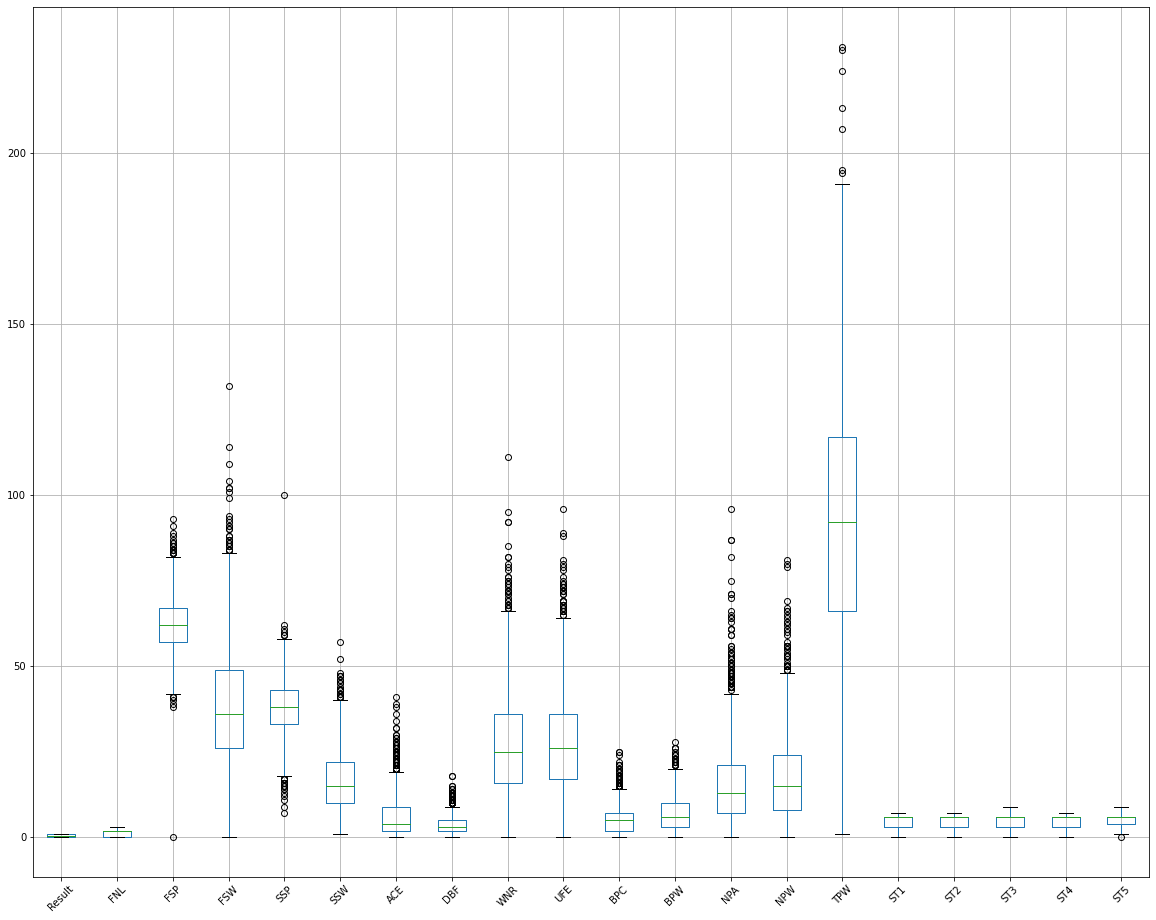

In [19]:
# generate boxplots to llok for outliers
df2.boxplot(column=list(df2.columns), figsize=(20, 16), rot=45)

In [20]:
d = pd.DataFrame(df['FSP.1'].describe())
d.loc['min', :]

FSP.1    38.0
Name: min, dtype: float64

In [21]:
def outliers(df):
    '''This is a function that will determine the outliers of a 
    column and will remove the outliers and return a cleaned data
    frame
    '''
    

## Part 3: Predictive Analysis

## Part 4: Conclusion

## Part 5: References